<a href="https://colab.research.google.com/github/Harshbhatt2409/Mining-Big-Data-/blob/main/(a1872953)_(Harsh_Alpesh_Bhatt)_assign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 2: Time Series Forecasting

### \<Harsh Alpesh Bhatt> \<a1872953>

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

**The task is to predict future energy use in a household based on weather conditions by building time series forecasting models.**

### 1. Read the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/energydata_complete.csv')

### 2. Analyse and visualise the data

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.shape

(19735, 29)

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

NO Null Values in the dataset

Categorical Variables

In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 1 categorical variables

The categorical variables are :

 ['date']


Numerical Variables

In [ ]:
numerical = [var_1 for var_1 in df.columns if df[var_1].dtype=='int64']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 2 numerical variables

The numerical variables are :

 ['Appliances', 'lights']


In [ ]:
numerical = [var_1 for var_1 in df.columns if df[var_1].dtype=='float64']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 26 numerical variables

The numerical variables are :

 ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


<ipython-input-49-2fa3620111af>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



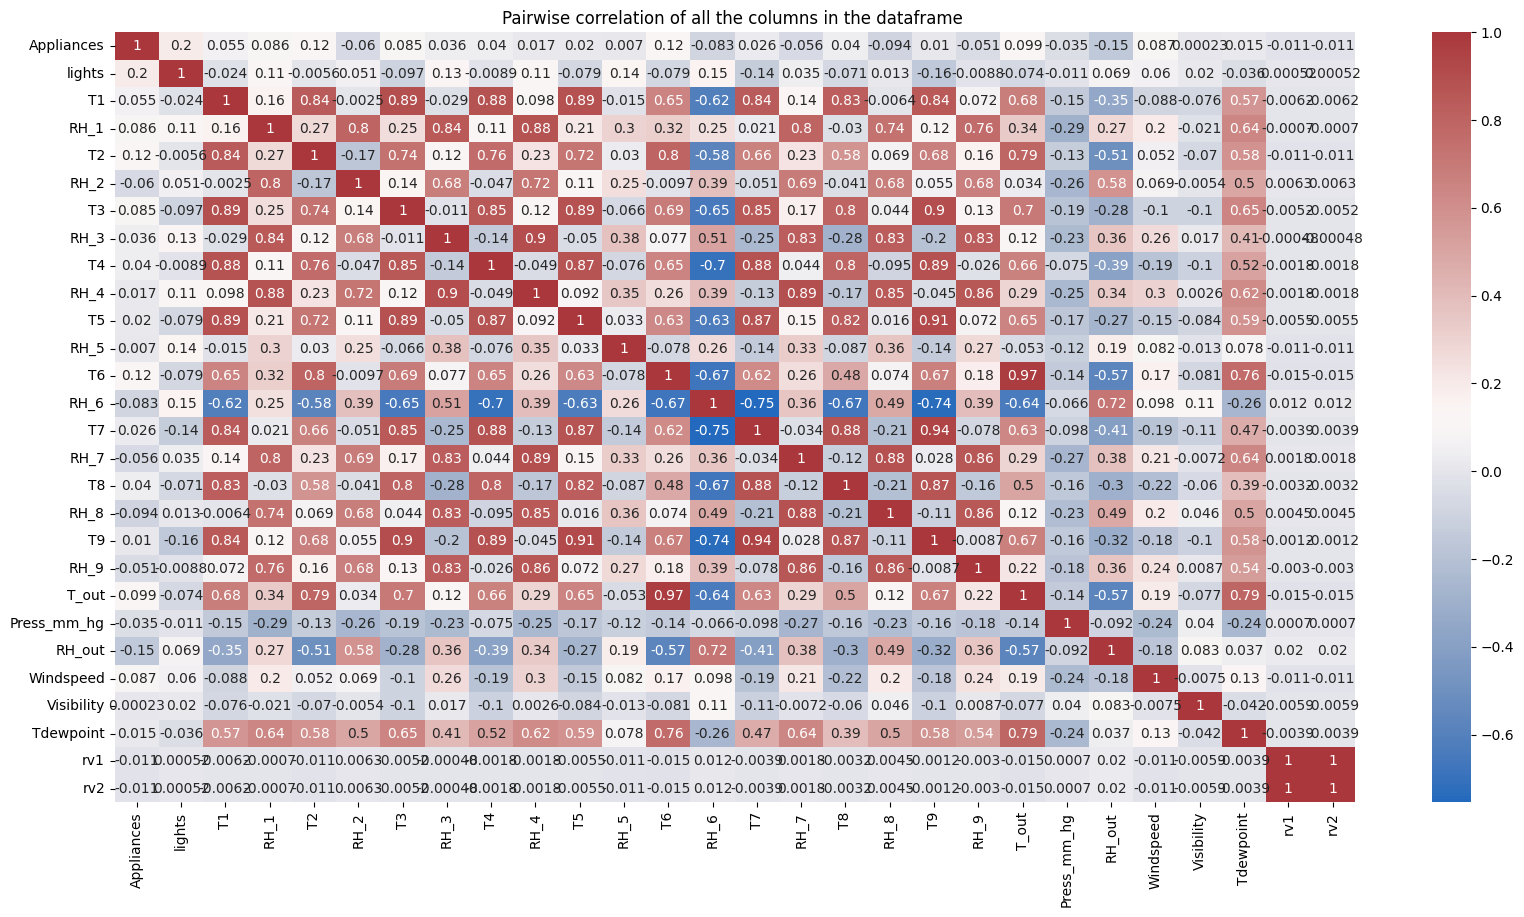

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(data= df.corr(), cmap="vlag", annot= True)
plt.title("Pairwise correlation of all the columns in the dataframe ")
plt.show()

<Axes: xlabel='date'>

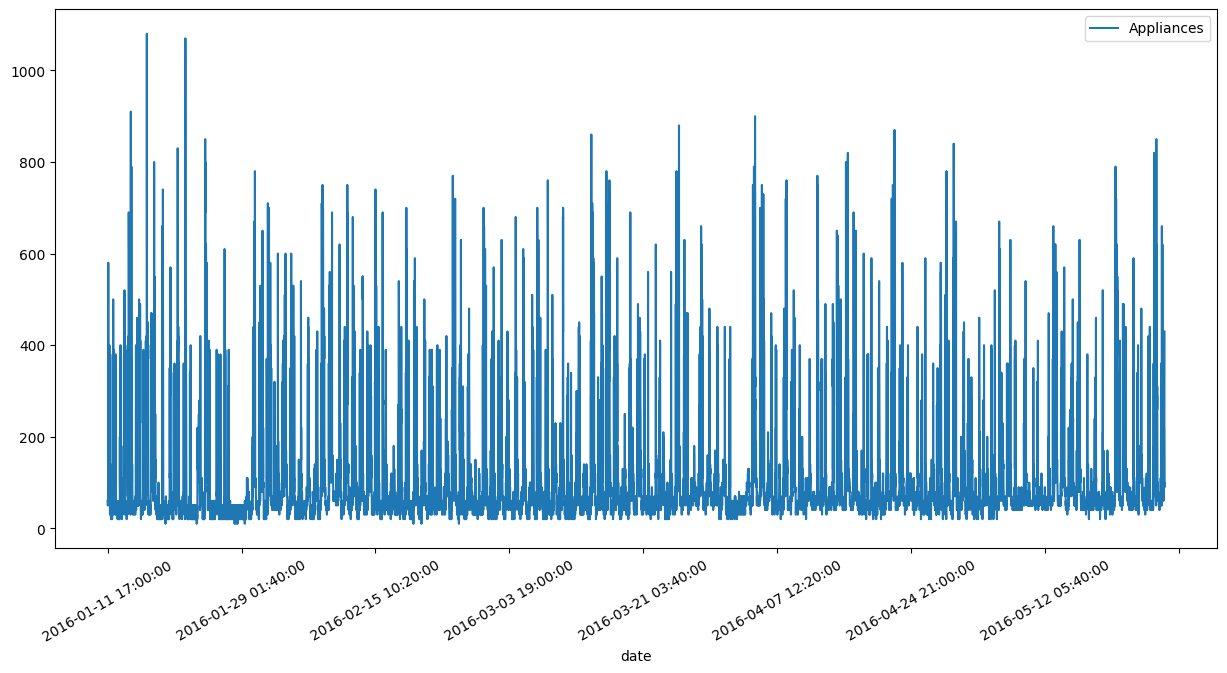

In [ ]:
df.plot(x='date', y='Appliances',figsize=(15,7), rot=30)

In the given problem we aim to predict the energy consumption from the house with the help of data collected from the sensors. For this assignment we are doing Time Series forecasting and so Date attribute will be the most important factor.

The date attribute here is String format, so we need to convert the data attribute into datetime or pandas timestamp format.

In [ ]:
df['date'] = pd.to_datetime(df['date'])
print(df['date'][0], list(df['date'])[-1])
type(df['date'][0])

2016-01-11 17:00:00 2016-05-27 18:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
len(df)

19735

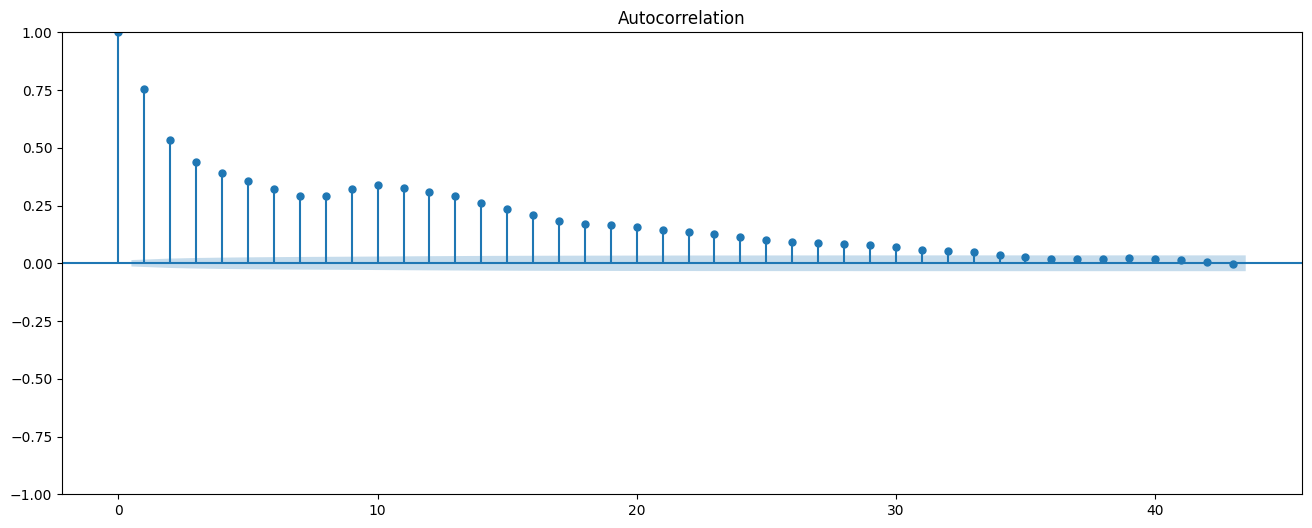

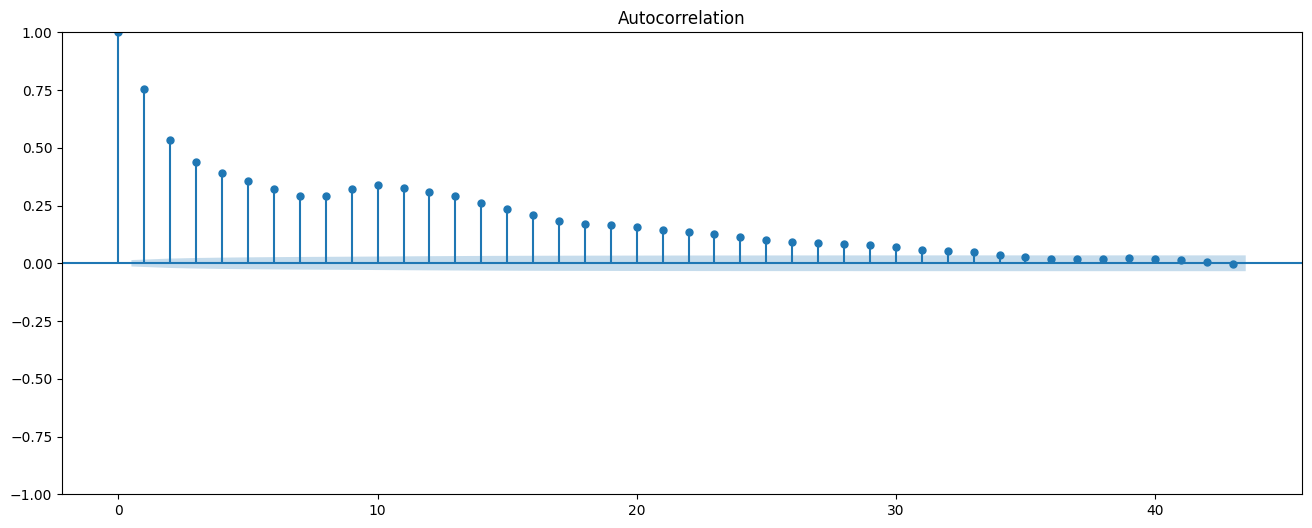

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Appliances'])

Our column of Interest is Appliances, as this will help predict the energy consumption.

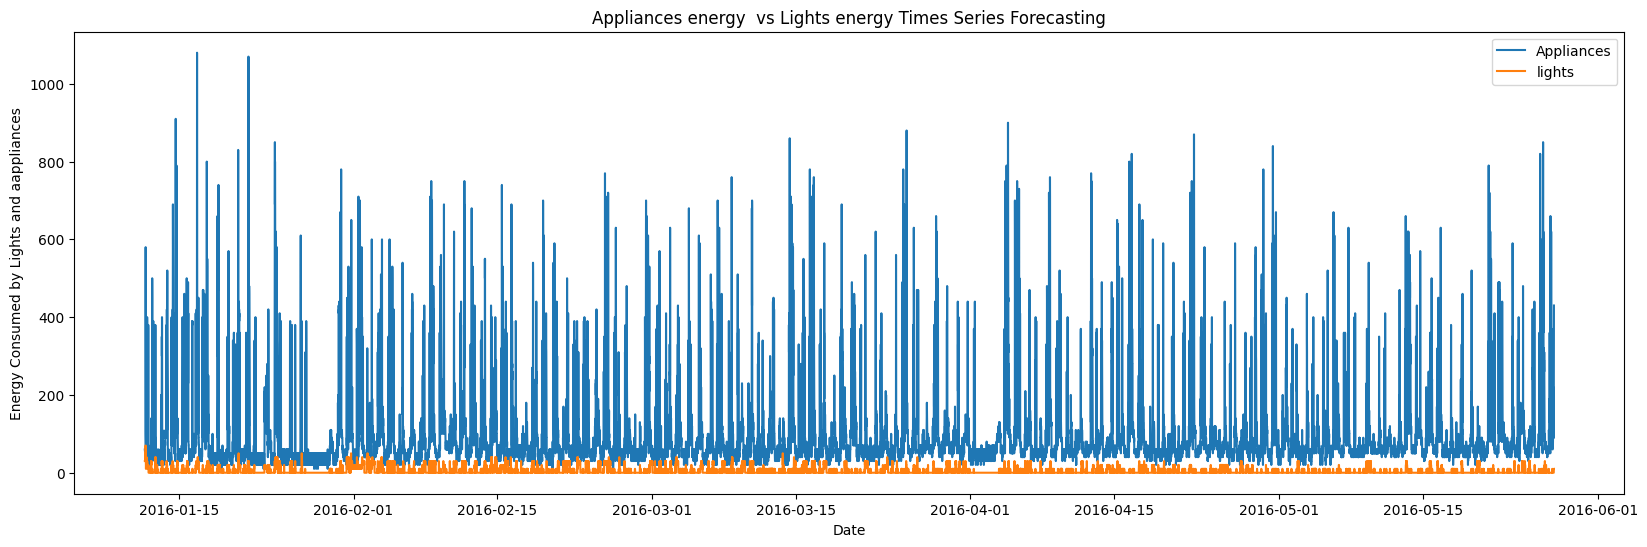

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(y=df['Appliances'],x = df['date'],linewidth = 1.5 , label = 'Appliances')
sns.lineplot(y=df['lights'],x = df['date'],linewidth = 1.5 , label = 'lights')
plt.xlabel ('Date')
plt.ylabel ('Energy Consumed by Lights and aappliances')
plt.title('Appliances energy  vs Lights energy Times Series Forecasting')
plt.show()

Data Observations

1. This dataset contains 29 variables and there are no null values
2. Variables T1 to T9 are Temperature Sensors and T_out is Temperature Outside the house (From Chievres weather station).
3. Variables RH_1 to RH_9 are Humidity sensors and RH_out is the humidity outside the house (From Chievres weather station).
4. This dataset also has other variables like Appliances: Energy use in Wh by the appliances in the house, lights: Energy used by lights in the house, Windspeed: in m/s (from Chievres weather station), Visibility: in km (from Chievres weather station), Tdewpoint: A^ degree C (from Chievres weather station).
5. This dataset also has two random variables namely rv1 and rv2. If no relation is found then we will drop this variables.
6. Our Target Variable for the given dataset will be "Appliance", which counts the Energy use in Wh which we want to predict as our outcome.
7. Appliances using more energy than Light at maximum times
8. The highest usage of energy for appliances was recoreded in 1st month of 2016
9. Appliances using more energy some days and very less somedays we need to figureout why by comparing with other features
10. Appliances energy usage was very high on starting and ending days of month but alters in middle. For this we have to do analysis on light and appliances energy once again seperatly.

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['date'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -0.3338156522128941
p-value: 0.9205766029324145
Critical Values:
	1%: -3.430682054856774
	5%: -2.8616867564516006
	10%: -2.5668481144708464


As the p-value of the dataset is 0.92 which is greater tham 0.05 it fails the null hypothesis (H0) meaning that the dataset has unit root and is non stationary.
The unnit root test is used to determine how strongly a time series is defined on by the trend.

### 3. Implement prediction models

**LSTM**

Long Short term Memory Network

In [ ]:
# LSTM for international airline passengers problem with time step regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('/content/energydata_complete.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

### 4. Train prediction models

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

Epoch 1/100
13218/13218 - 28s - loss: 0.0048 - 28s/epoch - 2ms/step
Epoch 2/100
13218/13218 - 27s - loss: 0.0042 - 27s/epoch - 2ms/step
Epoch 3/100
13218/13218 - 26s - loss: 0.0041 - 26s/epoch - 2ms/step
Epoch 4/100
13218/13218 - 26s - loss: 0.0041 - 26s/epoch - 2ms/step
Epoch 5/100
13218/13218 - 26s - loss: 0.0041 - 26s/epoch - 2ms/step
Epoch 6/100
13218/13218 - 26s - loss: 0.0041 - 26s/epoch - 2ms/step
Epoch 7/100
13218/13218 - 26s - loss: 0.0040 - 26s/epoch - 2ms/step
Epoch 8/100
13218/13218 - 26s - loss: 0.0040 - 26s/epoch - 2ms/step
Epoch 9/100
13218/13218 - 26s - loss: 0.0040 - 26s/epoch - 2ms/step
Epoch 10/100
13218/13218 - 26s - loss: 0.0040 - 26s/epoch - 2ms/step
Epoch 11/100
13218/13218 - 26s - loss: 0.0040 - 26s/epoch - 2ms/step
Epoch 12/100
13218/13218 - 26s - loss: 0.0040 - 26s/epoch - 2ms/step
Epoch 13/100
13218/13218 - 26s - loss: 0.0040 - 26s/epoch - 2ms/step
Epoch 14/100
13218/13218 - 26s - loss: 0.0040 - 26s/epoch - 2ms/step
Epoch 15/100
13218/13218 - 26s - loss: 0.00

### 5. Test prediction models and show results

Train Score: 65.80 RMSE
Test Score: 61.33 RMSE


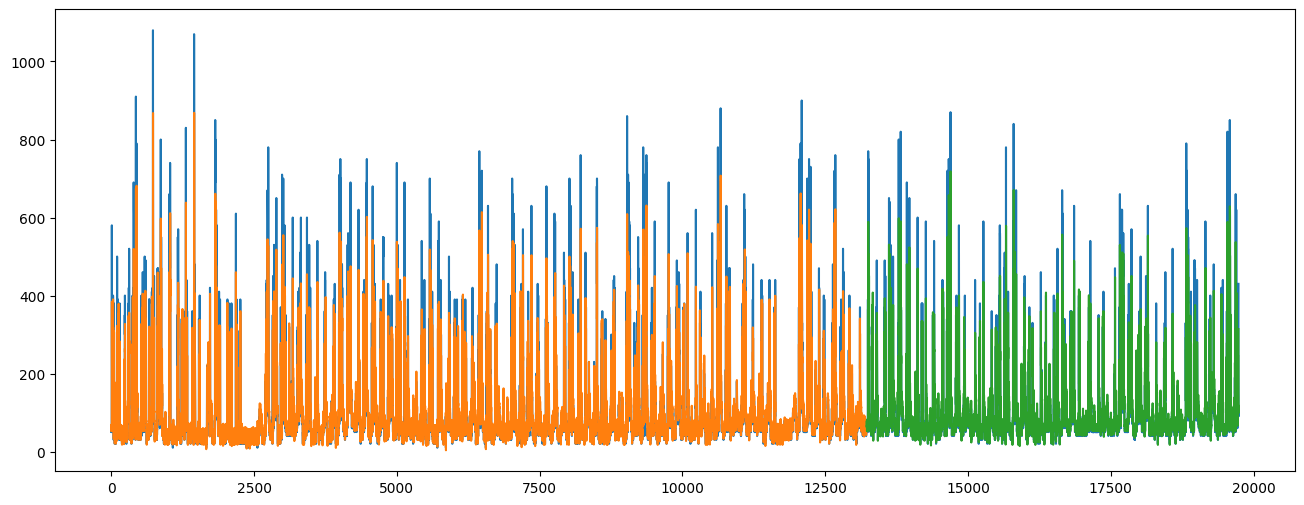

In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

The above graph shows how well the time series fits the trend. The orange part is the train score and green part is the test score. The blue part is the trend.
The RMSE score of train part is **65.32** and that of test part is **61.24**.


**ARIMA**

In [ ]:
from pylab import rcParams
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# Predicting the Appliances_energy
from statsmodels.tsa.arima.model import ARIMA
rcParams['figure.figsize'] = 16, 6
model = ARIMA(df['Appliances'].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                19734
Model:                 ARIMA(2, 1, 0)   Log Likelihood             -116305.225
Date:                Fri, 05 May 2023   AIC                         232616.450
Time:                        03:50:50   BIC                         232640.120
Sample:                             0   HQIC                        232624.199
                              - 19734                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5710      0.003   -213.838      0.000      -0.576      -0.566
ar.L2         -0.3941      0.003   -128.691      0.000      -0.400      -0.388
sigma2      7708.5715     26.983    285.678      0.0

In [ ]:
import math
rmse = math.sqrt(mean_squared_error(df['Appliances'].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 78.05257188673792.


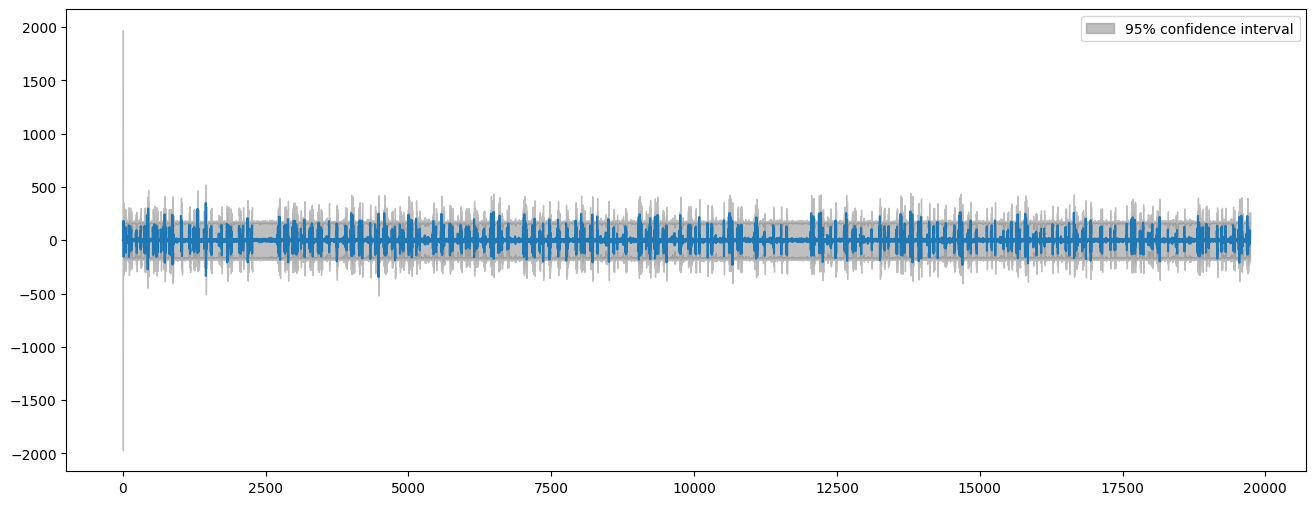

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(result, dynamic = False)
plt.show()

The above shown graph shows how well the time series fits the trend. The RMSE value is 78.0525.

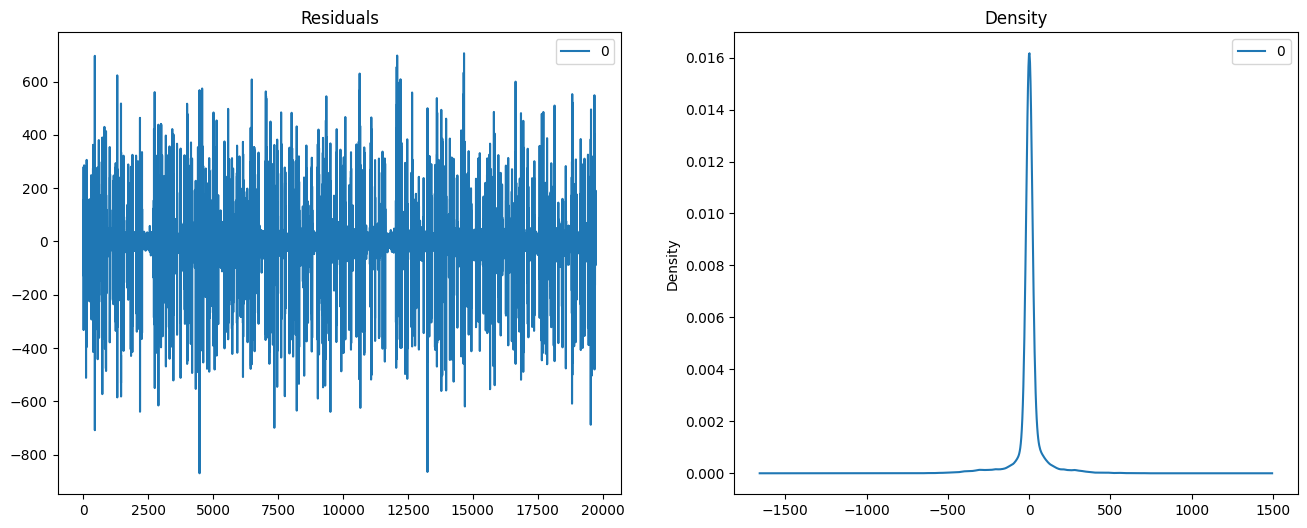

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



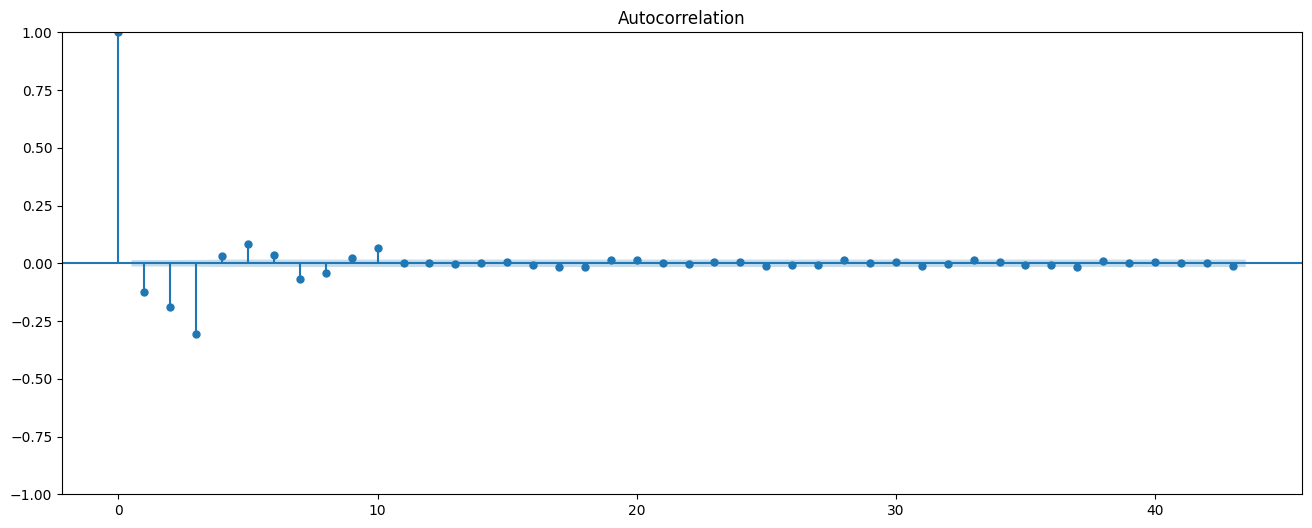

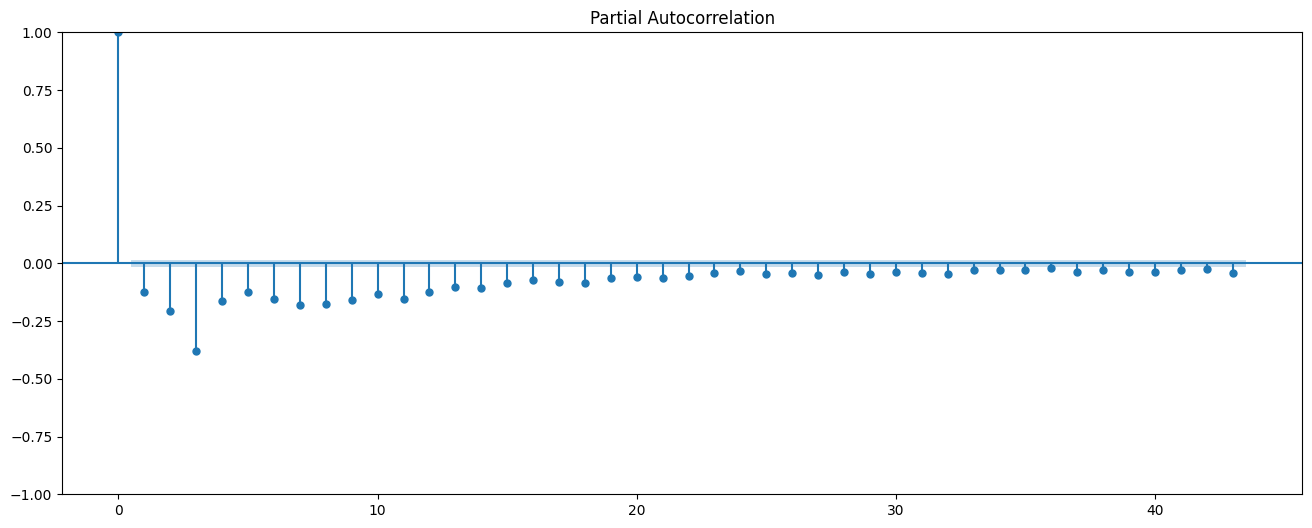

In [ ]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

Autocorrelation is a function that provides correlation of dataset with itself on different delays(lags). The above graph represents this.

In [ ]:
from pandas import DataFrame
train_error=[trainScore, testScore, rmse]
col={'RMSE score':train_error}
models=['LSTM Train Score','LSTM Test Score', 'ARIMA']
df=DataFrame(data=col,index=models)
df

,RMSE score
LSTM Train Score,65.801352
LSTM Test Score,61.326320
ARIMA,78.052572


<Axes: >

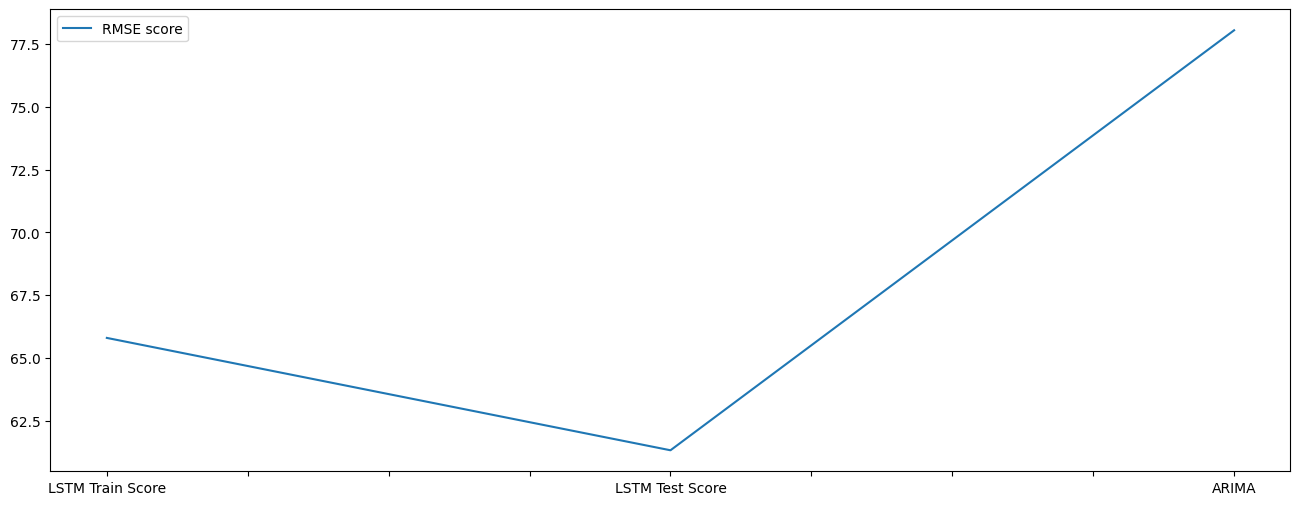

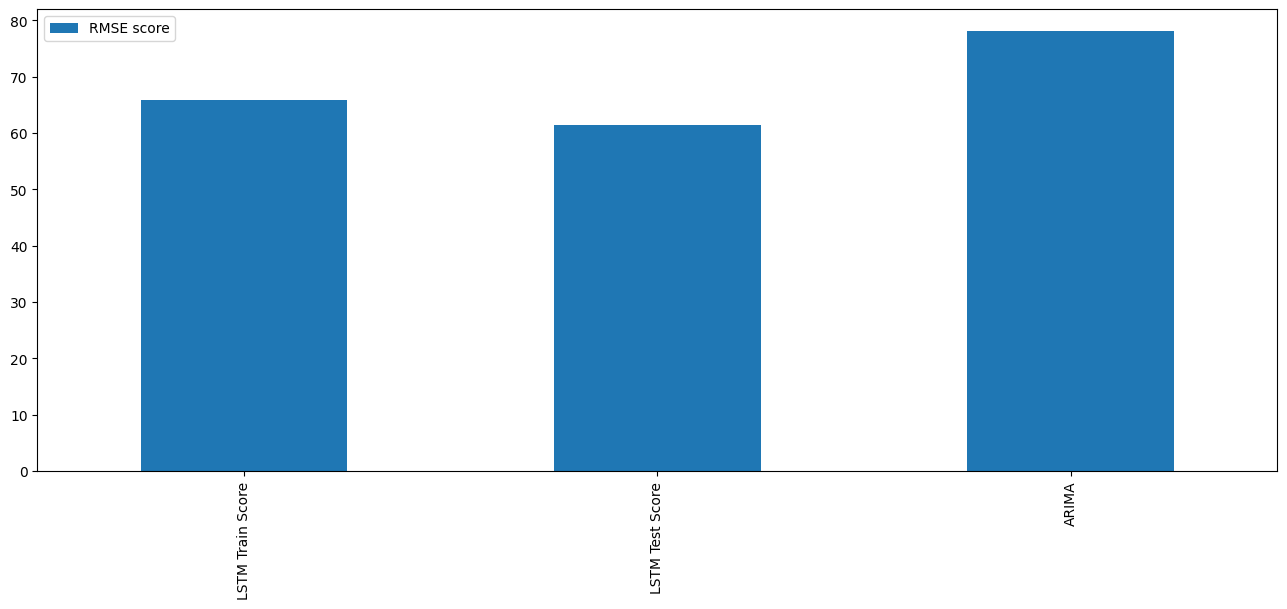

In [ ]:
df.plot(kind='line')
df.plot(kind='bar')

### 6. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

Compare the results from all candidate models, choose the best model, justify your choice and discuss the results.

Compare with the results you have obtained in Assignment 1.

The appropriate model for your time-series data will depend on the data’s particular characteristics, for example, if the dataset has an overall trend or seasonality. Please be sure to choose the model that best suits your data.


-> For this assignemnt i have used 2 Time series forecasting Techniques namely: Long Short Term Memory Network(LSTM) and Autoregressive integrated moving average (ARIMA).

-> The reason why I have chosen ARIMA is, it is a model used for statictics and econometrics to measure events that happen over a period of time. The model is used to understand past data to predict future data in a series. It can account for various patterns, such as linear or nonlinear trends, constant or varying volatility and seasonal or non- seasonal fluctuations. They are also easy to implement as they require only few parameters and gives better result then most forecasting techniques.

-> LSTM's are used to learn, process and classify sequential data because these networks can learn long-term dependencies between time steps of the data. It is a type of Recurrent Neural Network with higher memory power to remember the outputs of each node for a more extended period to produce the outcome for the next node efficiently. As LSTM can predict future values based on previous, sequential data, it provides greater accuracy as it allows more parameters to be learned.

-> According to my results, for the given problem and the given dataset it is best to use ARIMA for prediction of Energy consumption when time series forecasting is involved.

-> The following tables shows the results of assignment 1 and this assignment:

| Model | Train Score | RMSE |
| --- | --- | --- |
| Gradient Boosting Machine| 0.9966 |  |
| Logistic Regression  | 0.2690 |  |
| Multiple Linear Regression | 0.1737 |  |
| Random Forest | 0.9364 |  |
| Support Vector Machine | 0.2621 |  |
| Long Short Term Memory Network|65.321993 |65.321993 |
| Autoregressive Integrated Moving Average| |78.052572 |


-> So from the above table it is safe to say that we want a normal prediction we choose Gradient Boosting Machine (GBM) as it enables is to combine predictions from various learner models and build a final predictive model having the correct prediction and when Time series forecasting is involved then AutoRegressive Integrated Moving Average (ARIMA) is best as it is used to understand past data to predict future data in a series. It can account for various patterns, such as linear or nonlinear trends, constant or varying volatility and seasonal or non- seasonal fluctuations. They are also easy to implement as they require only few parameters and gives better result then most forecasting techniques.

### 7. Reflect on what you have learned by completing this assignment

1. Time Series Forecasting Techniques
2. Long Short term memory network using RNN
3. AutoRegrerssive Integrated Moving Average (ARIMA) and different AR time series forecasting models.
4. Other AR time series methods like SARIMA, AR etc.
5. Naive forecasting and Seasonal Naive method
6. Data visualization and Analysis Techniques.
7. Augmented Dickey-Fuller test.

### 8. References

1. Link to Assignment 1:
https://colab.research.google.com/drive/1GO8Y0mw_tIuNyIXofYcBBBWnlW7xL1i6?usp=sharing

2. Metrics and scoring: quantifying the quality of predictions:
https://scikit-learn.org/stable/modules/model_evaluation.html#visual-evaluation-of-regression-models

3. Long Short Term Memory Network(LSTM)
  
  3.1 https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

  3.2 https://www.geeksforgeeks.org/long-short-term-memory-lstm-rnn-in-tensorflow/

4. AutoRegressive Integrated Moving Average (ARIMA)
  
  4.1 https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

  4.2 https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7

5. Different AR Models for time series forecasting
https://vitalflux.com/different-types-of-time-series-forecasting-models/

6. Naive Method and Seasonal Naive Method
https://towardsdatascience.com/basic-forecasting-techniques-ef4295248e46




